In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_excel('B:\capstone project 2\city_temperature.xlsx')

# Display the first few rows to understand the data structure
print(df.head())

   Region  Country  State     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria    NaN  Algiers      1    1  1995            64.2
1  Africa  Algeria    NaN  Algiers      1    2  1995            49.4
2  Africa  Algeria    NaN  Algiers      1    3  1995            48.8
3  Africa  Algeria    NaN  Algiers      1    4  1995            46.4
4  Africa  Algeria    NaN  Algiers      1    5  1995            47.9


In [4]:
df

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
1048570,Middle East,Oman,NaN,Muscat,2,7,1999,-99.0
1048571,Middle East,Oman,NaN,Muscat,2,8,1999,-99.0
1048572,Middle East,Oman,NaN,Muscat,2,9,1999,-99.0
1048573,Middle East,Oman,NaN,Muscat,2,10,1999,-99.0


In [5]:
df.isnull().sum()


Region                  0
Country                 0
State             1048575
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

In [6]:
df1=df.drop('State',axis=1)

In [7]:
df1

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,64.2
1,Africa,Algeria,Algiers,1,2,1995,49.4
2,Africa,Algeria,Algiers,1,3,1995,48.8
3,Africa,Algeria,Algiers,1,4,1995,46.4
4,Africa,Algeria,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...
1048570,Middle East,Oman,Muscat,2,7,1999,-99.0
1048571,Middle East,Oman,Muscat,2,8,1999,-99.0
1048572,Middle East,Oman,Muscat,2,9,1999,-99.0
1048573,Middle East,Oman,Muscat,2,10,1999,-99.0


In [8]:
df['AvgTemperature'].unique()

array([ 64.2,  49.4,  48.8, ..., 108.8, 109.3, 109.8])

In [9]:
filtered_df1 = df1[(df1['AvgTemperature'] > 0) & (df1['AvgTemperature'] <= 120)]

In [10]:
filtered_df1

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,64.2
1,Africa,Algeria,Algiers,1,2,1995,49.4
2,Africa,Algeria,Algiers,1,3,1995,48.8
3,Africa,Algeria,Algiers,1,4,1995,46.4
4,Africa,Algeria,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...
1047071,Middle East,Lebanon,Beirut,5,13,2020,67.8
1047180,Middle East,Oman,Muscat,4,19,1995,82.8
1047338,Middle East,Oman,Muscat,9,24,1995,94.5
1047339,Middle East,Oman,Muscat,9,25,1995,92.6


In [11]:
# Filter the dataset for Chennai
chennai_df = df1[df1['City'] == 'Chennai (Madras)']

print(chennai_df.shape)

# Display the filtered data
print(chennai_df.head())

(9266, 7)
       Region Country              City  Month  Day  Year  AvgTemperature
331055   Asia   India  Chennai (Madras)      1    1  1995            72.4
331056   Asia   India  Chennai (Madras)      1    2  1995            73.5
331057   Asia   India  Chennai (Madras)      1    3  1995            72.6
331058   Asia   India  Chennai (Madras)      1    4  1995            75.2
331059   Asia   India  Chennai (Madras)      1    5  1995            74.8


In [12]:
chennai_df

,Region,Country,City,Month,Day,Year,AvgTemperature
331055,Asia,India,Chennai (Madras),1,1,1995,72.4
331056,Asia,India,Chennai (Madras),1,2,1995,73.5
331057,Asia,India,Chennai (Madras),1,3,1995,72.6
331058,Asia,India,Chennai (Madras),1,4,1995,75.2
331059,Asia,India,Chennai (Madras),1,5,1995,74.8
...,...,...,...,...,...,...,...
340316,Asia,India,Chennai (Madras),5,9,2020,90.1
340317,Asia,India,Chennai (Madras),5,10,2020,89.4
340318,Asia,India,Chennai (Madras),5,11,2020,89.5
340319,Asia,India,Chennai (Madras),5,12,2020,87.5


In [13]:
print(chennai_df)

       Region Country              City  Month  Day  Year  AvgTemperature
331055   Asia   India  Chennai (Madras)      1    1  1995            72.4
331056   Asia   India  Chennai (Madras)      1    2  1995            73.5
331057   Asia   India  Chennai (Madras)      1    3  1995            72.6
331058   Asia   India  Chennai (Madras)      1    4  1995            75.2
331059   Asia   India  Chennai (Madras)      1    5  1995            74.8
...       ...     ...               ...    ...  ...   ...             ...
340316   Asia   India  Chennai (Madras)      5    9  2020            90.1
340317   Asia   India  Chennai (Madras)      5   10  2020            89.4
340318   Asia   India  Chennai (Madras)      5   11  2020            89.5
340319   Asia   India  Chennai (Madras)      5   12  2020            87.5
340320   Asia   India  Chennai (Madras)      5   13  2020            84.2

[9266 rows x 7 columns]


In [14]:
chennai_df.isnull().sum()

Region            0
Country           0
City              0
Month             0
Day               0
Year              0
AvgTemperature    0
dtype: int64

In [15]:
chennai_df['Date'] = pd.to_datetime(chennai_df[['Year', 'Month', 'Day']])
chennai_df.set_index('Date', inplace=True)
chennai_df


C:\Users\Admin\AppData\Local\Temp\ipykernel_18816\1985403211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chennai_df['Date'] = pd.to_datetime(chennai_df[['Year', 'Month', 'Day']])


,Region,Country,City,Month,Day,Year,AvgTemperature
Date,,,,,,,
1995-01-01,Asia,India,Chennai (Madras),1,1,1995,72.4
1995-01-02,Asia,India,Chennai (Madras),1,2,1995,73.5
1995-01-03,Asia,India,Chennai (Madras),1,3,1995,72.6
1995-01-04,Asia,India,Chennai (Madras),1,4,1995,75.2
1995-01-05,Asia,India,Chennai (Madras),1,5,1995,74.8
...,...,...,...,...,...,...,...
2020-05-09,Asia,India,Chennai (Madras),5,9,2020,90.1
2020-05-10,Asia,India,Chennai (Madras),5,10,2020,89.4
2020-05-11,Asia,India,Chennai (Madras),5,11,2020,89.5


In [16]:
chennai_df

,Region,Country,City,Month,Day,Year,AvgTemperature
Date,,,,,,,
1995-01-01,Asia,India,Chennai (Madras),1,1,1995,72.4
1995-01-02,Asia,India,Chennai (Madras),1,2,1995,73.5
1995-01-03,Asia,India,Chennai (Madras),1,3,1995,72.6
1995-01-04,Asia,India,Chennai (Madras),1,4,1995,75.2
1995-01-05,Asia,India,Chennai (Madras),1,5,1995,74.8
...,...,...,...,...,...,...,...
2020-05-09,Asia,India,Chennai (Madras),5,9,2020,90.1
2020-05-10,Asia,India,Chennai (Madras),5,10,2020,89.4
2020-05-11,Asia,India,Chennai (Madras),5,11,2020,89.5


In [17]:
chennai_df1=chennai_df.drop(['Month','Day','Year','Region','Country','City'],axis=1)

In [18]:
chennai_df1.tail()


,AvgTemperature
Date,
2020-05-09,90.1
2020-05-10,89.4
2020-05-11,89.5
2020-05-12,87.5
2020-05-13,84.2


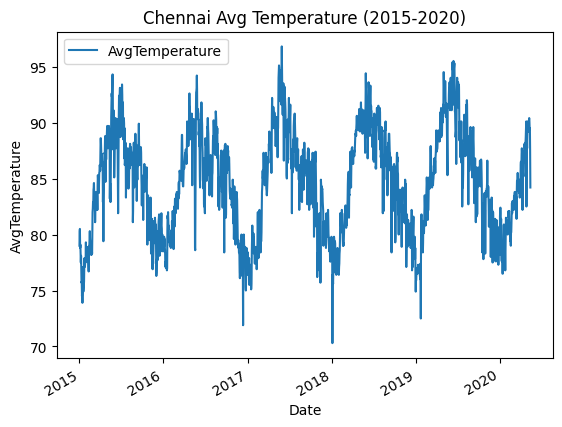

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data from 2015 to 2020
filtered_df = chennai_df1.loc['2015-01-01':'2020-05-13']

# Identify and remove unrealistic temperature values
filtered_df = filtered_df[(filtered_df['AvgTemperature'] > 0) & (filtered_df['AvgTemperature'] <= 120)]

# Plot the cleaned data
filtered_df['AvgTemperature'].plot()
plt.xlabel('Date')
plt.ylabel('AvgTemperature')
plt.title('Chennai Avg Temperature (2015-2020)')
plt.legend()
plt.show()

In [20]:
filtered_df

,AvgTemperature
Date,
2015-01-01,79.0
2015-01-02,80.3
2015-01-03,80.5
2015-01-04,78.8
2015-01-05,79.1
...,...
2020-05-09,90.1
2020-05-10,89.4
2020-05-11,89.5


In [21]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(filtered_df)

# Define sequence length and features
sequence_length = 10  # Number of time steps in each sequence
num_features = len(filtered_df.columns)

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i+sequence_length]
    label = scaled_data[i+sequence_length][0]  # '_tempm' column index
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_size = int(0.8 * len(sequences))
train_x, test_x = sequences[:train_size], sequences[train_size:]
train_y, test_y = labels[:train_size], labels[train_size:]

print("Train X shape:", train_x.shape)
print("Train Y shape:", train_y.shape)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)

Train X shape: (1552, 10, 1)
Train Y shape: (1552,)
Test X shape: (389, 10, 1)
Test Y shape: (389,)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Create the LSTM model
model = Sequential()

# Add LSTM layers with dropout
model.add(LSTM(units=128, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))

# Add a dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,417 (501.63 KB)

 Trainable params: 128,417 (501.63 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights= True)
model_checkpoint=ModelCheckpoint('F:/ANN/ANN Project/cps project 2/best_weight.keras',monitor='val_loss',save_best_only=True)
# Train the model
history=model.fit(train_x, train_y, batch_size=64, epochs=100, validation_split=0.2, callbacks=[early_stopping,model_checkpoint])

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.1672 - val_loss: 0.0211
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0181 - val_loss: 0.0091
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0137 - val_loss: 0.0078
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0129 - val_loss: 0.0074
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0114 - val_loss: 0.0072
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0114 - val_loss: 0.0070
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0117 - val_loss: 0.0070
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0111 - val_loss: 0.0071
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0110 - val_loss: 0.0070
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0113 - val_loss: 0.0074
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0115 - val_loss: 0.0070
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

In [26]:
import tensorflow as tf

In [27]:
# Evaluate the best model on the test set
best_model = tf.keras.models.load_model('F:/ANN/ANN Project/cps project 2/best_weight.keras')
test_loss = best_model.evaluate(test_x, test_y)
print("Test Loss:", test_loss)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0041 
Test Loss: 0.003605882404372096


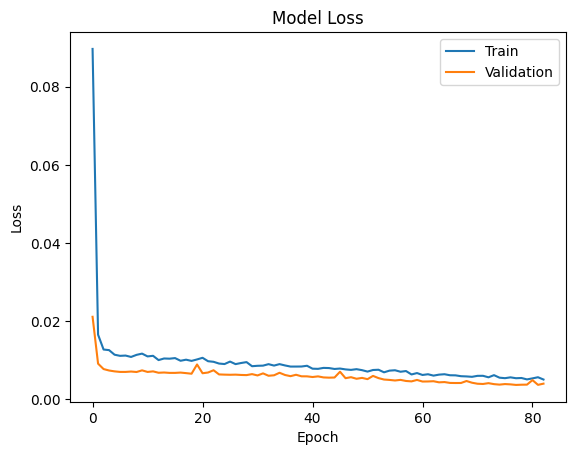

In [28]:

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have trained the model and have the 'best_model' object
# Also, 'test_x' and 'test_y' should be available

# Predict temperatures using the trained model
predictions = best_model.predict(test_x)

# Calculate evaluation metrics
mae = mean_absolute_error(test_y, predictions)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Mean Absolute Error (MAE): 0.04396623479161826
Mean Squared Error (MSE): 0.003605882269412787
Root Mean Squared Error (RMSE): 0.060048998904334676


In [30]:
from sklearn.metrics import r2_score

# Calculate R² score
r2 = r2_score(test_y, predictions)
print("R-squared (R²):", r2)


R-squared (R²): 0.8841473371066021


In [31]:
model.save("temperature_prediction_model.h5")